In [105]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv' , 'order_items')# Added payments.csv for specific handling  
]

# Connect to the MySQL daaabase
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Root',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/vidya/OneDrive/Desktop/e-Commers Dataset'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [107]:
pip install pandas

In [84]:
 pip install mysql-connector-python

In [85]:
pip install matplotlib

In [86]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Root',
    database='ecommerce'
)
cur = db.cursor()

# List all unique cities where customers are located.

In [88]:
query = """select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [89]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"""Total order place in year 2017 are""",data[0][0]

('Total order place in year 2017 are', 315707)

# Find the total sales per category.

In [90]:
query = """select upper(products.product_category) category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,18242591.76
1,FURNITURE DECORATION,51486350.10
2,TELEPHONY,17527753.83
3,FASHION BAGS AND ACCESSORIES,7853698.08
4,BED TABLE BATH,61651932.16
...,...,...
69,CDS MUSIC DVDS,43179.48
70,LA CUISINE,104887.08
71,FASHION CHILDREN'S CLOTHING,28284.12
72,PC GAMER,78279.48


# Calculate the percentage of orders that were paid in installments.

In [91]:
query = """select (sum(case when payment_installments >= 1 then 1 else 0 end ))/ count(*)*100
from payments"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is" ,data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

# Count the number of customers from each state. 

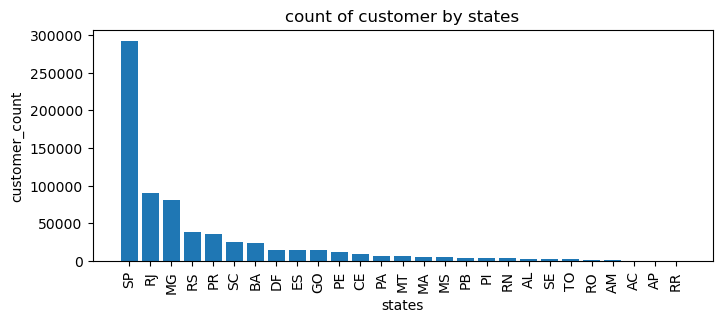

In [92]:
query = """select customer_state,count(customer_id)
from customers group by customer_state"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["state","customer_count"])
df = df.sort_values(by = "customer_count",ascending = False)

plt.figure(figsize = (8,3))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("count of customer by states")
plt.show()

#  Calculate the number of orders per month in 2018.

<function matplotlib.pyplot.show(close=None, block=None)>

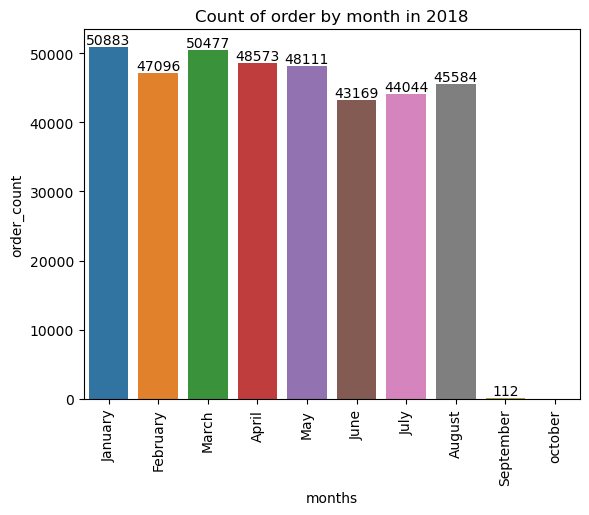

<Figure size 800x400 with 0 Axes>

In [94]:
query = """select monthname(order_purchase_timestamp) month, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by month"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["months","order_count"])
o = ["January","February","March","April","May","June","July","August","September","october"]

ax = sns.barplot(x = df["months"],y = df["order_count"],data = df, order = o)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.title("Count of order by month in 2018")
plt.figure(figsize = (8,4))
plt.show

#  Find the average number of products per order, grouped by customer city.

In [95]:
query = """with count_per_order as 
(SELECT orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2) average_order
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
order by average_order desc
"""
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["customer_city","average_order"])
df.head(10)

,customer_city,average_order
0,padre carvalho,147.00
1,celso ramos,136.50
2,datas,126.00
3,candido godoi,126.00
4,matias olimpio,105.00
5,cidelandia,84.00
6,curralinho,84.00
7,picarra,84.00
8,morro de sao paulo,84.00
9,teixeira soares,84.00


#  Calculate the percentage of total revenue contributed by each product category.

In [96]:
query = """select upper(products.product_category) category,
round((sum(payments.payment_value) / (select sum(payment_value) from payments)) * 100,2)  sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
order by sales_percentage desc"""

cur.execute(query)

data = cur.fetchall()


df = pd.DataFrame(data,columns = ["Category","percentage_distibution"])
df.head(10)

,Category,percentage_distibution
0,BED TABLE BATH,128.37
1,HEALTH BEAUTY,124.23
2,COMPUTER ACCESSORIES,118.83
3,FURNITURE DECORATION,107.20
4,WATCHES PRESENT,107.13
5,SPORT LEISURE,104.35
6,HOUSEWARES,82.06
7,AUTOMOTIVE,63.89
8,GARDEN TOOLS,62.84
9,COOL STUFF,58.44


#  Identify the correlation between product price and the number of times a product has been purchased.

In [97]:
import numpy as np
query = """SELECT products.product_category,count(order_items.product_id),
round(avg(order_items.price),2)
from products join  order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category","order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

#  Calculate the total revenue generated by each seller, and rank them by revenue.

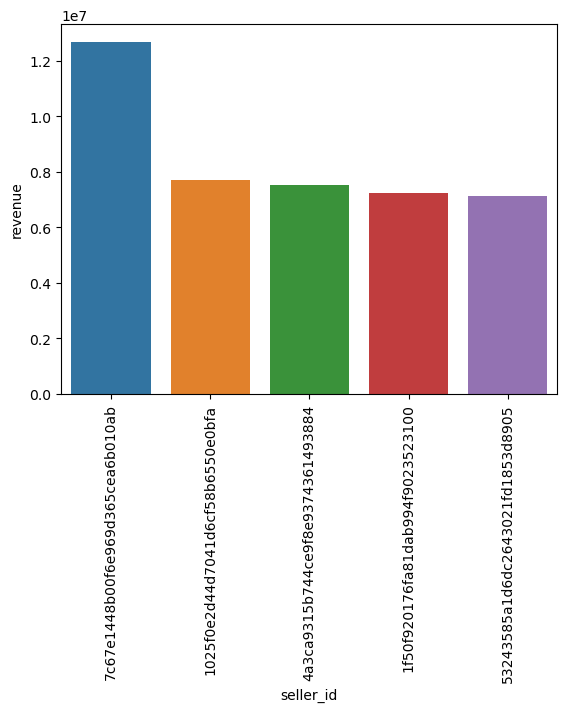

In [113]:
query = """select *,dense_rank() over (order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id","revenue","rank"])
df = df.head()
sns.barplot(x="seller_id",y="revenue",data = df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:

#  Calculate the cumulative sales per month for each year.
#  Calculate the year-over-year growth rate of total sales.
#  Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
#  Identify the top 3 customers who spent the most money in each year.

#  Calculate the moving average of order values for each customer over their order history.

In [9]:
query = """select customer_id,order_purchase_timestamp, payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns = ["customer_id","order_purchase_timestamp","payment","mov_avg"])
df

,customer_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
5194295,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
5194296,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
5194297,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
5194298,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


#  Calculate the cumulative sales per month for each year.

<function matplotlib.pyplot.show(close=None, block=None)>

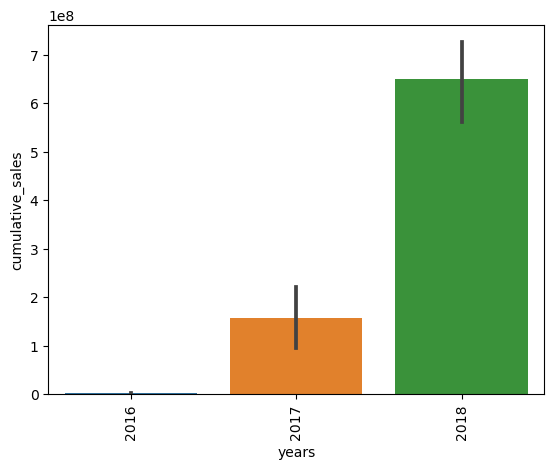

In [24]:
query = """select years,months, payment, sum(payment)
over(order by years ,months) cumulative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years,months order by years , months) as a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["years","months","payment","cumulative_sales"])
sns.barplot(x="years",y="cumulative_sales",data=df)
plt.xticks(rotation=90)
plt.show

#  Calculate the year-over-year growth rate of total sales

In [31]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years,((payment-lag(payment,1) over (order by years))/lag(payment,1) over (order by years))*100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["years","yoy % grouth"])
df


,years,yoy % grouth
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924


#  Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [35]:
query = """with a as (
select customer_id,min(orders.order_purchase_timestamp) as first_order
from orders
group by orders.customer_id
),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) as next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > a.first_order
and orders.order_purchase_timestamp < date_add(a.first_order,	INTERVAL 6 month)
group by a.customer_id)

select 100 * count(distinct a.customer_id) / count(distinct b.customer_id)
from a left join b
on a.customer_id = b.customer_id;"""
cur.execute(query)
data = cur.fetchall()
data


[(None,)]

#### since none of customers are repeated from last 6 month thats why the value is none.

#  Identify the top 3 customers who spent the most money in each year.

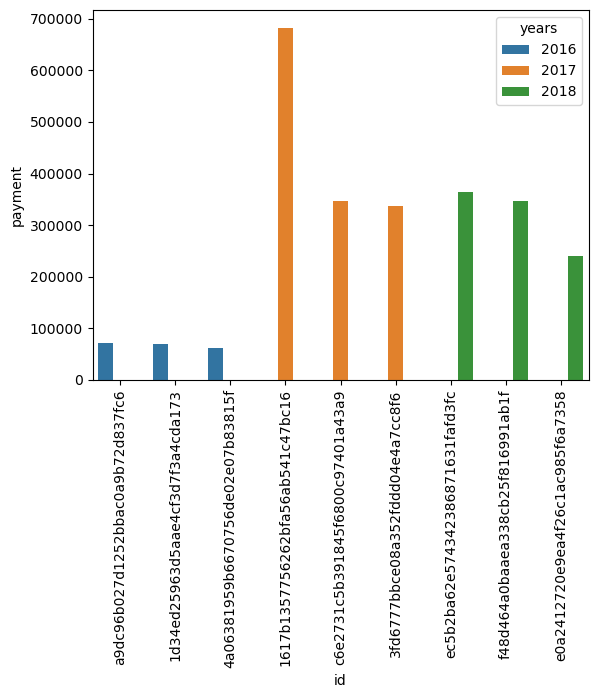

In [42]:
query = """select  years,customer_id,payment,d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3;"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["years","id","payment","rank"])
sns.barplot(x="id",y="payment",data = df,hue = "years")
plt.xticks(rotation =90)
plt.show()